## Import all the library required library files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')

from sklearn.model_selection import train_test_split 

# import the metrics class
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(r'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
print(df.shape)
print(df.columns)
print(df.info())
df.describe()

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

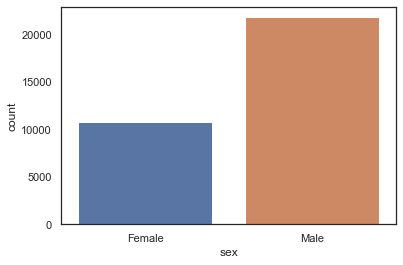

In [5]:
sns.countplot(x="sex", data=df)

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


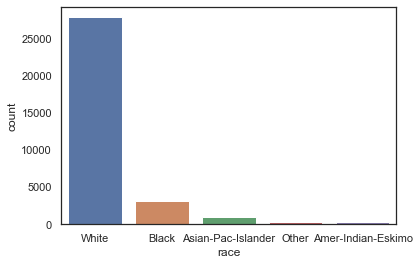

In [6]:
print(df.race.value_counts())
sns.countplot(x="race", data=df)

In [7]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [8]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

## Identify the presence of missing values

In [9]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
# code will replace the special character to nan and then drop the columns 
df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [11]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## fill the missing values with mean for numerical attributes and mode value for categorical attributes. 

In [12]:
#Filling missing values of the numeric variables using its mean
df['age'].fillna((df['age'].mean()), inplace = True)
df['fnlwgt'].fillna((df['fnlwgt'].mean()), inplace = True)
df['education.num'].fillna((df['education.num'].mean()), inplace = True)
df['capital.gain'].fillna((df['capital.gain'].mean()), inplace = True)
df['capital.loss'].fillna((df['capital.loss'].mean()), inplace = True)
df['hours.per.week'].fillna((df['hours.per.week'].mean()), inplace = True)
df['income'].fillna((df['income'].mean()), inplace = True)

In [13]:
#Filling missing values of the categorical variables using its mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)
df['education'].fillna(df['education'].mode(), inplace = True)
df['marital.status'].fillna((df['marital.status'].mode()), inplace = True)
df['occupation'].fillna((df['occupation'].mode()[0]), inplace = True)
df['relationship'].fillna((df['relationship'].mode()), inplace = True)
df['race'].fillna((df['race'].mode()), inplace = True)
df['sex'].fillna((df['sex'].mode()), inplace = True)
df['native.country'].fillna((df['native.country'].mode()[0]), inplace = True)

In [14]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [15]:
df.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#df = df.apply(le.fit_transform)

In [17]:
df = df.apply(le.fit_transform)

## X as all columns except the Income column and Y as Income column.

In [18]:
X = df.drop('income',axis=1)
y = df.income

## Split the data into training set and testing set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)

## Model the classifier using GaussianNB, BernoulliNB and MultinomialNB

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


## accuracy and confusion matrix

In [21]:
print("Training Accuracy:",metrics.accuracy_score(y_train, gnb.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Accuracy: 0.8183737714987716
Test Accuracy: 0.8132964839551666


In [22]:
from sklearn.metrics import confusion_matrix
cm_gnb = confusion_matrix(y_test, y_pred)
print(cm_gnb)

[[4622  354]
 [ 862  675]]


## Model the classifier using BernoulliNB

In [23]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(y_pred)

[1 0 0 ... 1 0 1]


## accuracy and confusion matrix

In [24]:
print("Training Accuracy:",metrics.accuracy_score(y_train, bnb.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Accuracy: 0.7295377764127764
Test Accuracy: 0.7254721326577614


In [25]:
from sklearn.metrics import confusion_matrix
cm_bnb = confusion_matrix(y_test, y_pred)
print(cm_bnb)

[[3615 1361]
 [ 427 1110]]


## Model the classifier using MultinomialNB

In [26]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


## accuracy and confusion matrix

In [27]:
print("Training Accuracy:",metrics.accuracy_score(y_train, mnb.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Accuracy: 0.703585687960688
Test Accuracy: 0.699677567941041


In [28]:
from sklearn.metrics import confusion_matrix
cm_mnb = confusion_matrix(y_test, y_pred)
print(cm_mnb)

[[3854 1122]
 [ 834  703]]


## an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted). 

In [29]:
import csv
fields = ['Actual', 'Predicted'] 
temp = list(y_test)
with open('ML_Q2_output.csv', 'w', newline='') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(fields)
    for i in range(0,len(temp)):
        filewriter.writerow((temp[i], y_pred[i]))

## Plot the decision boundary

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Age",fontsize=15)
    plt.ylabel("workclass",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

Text(0.5, 1.0, 'Bernoulli Naive Bayes Decission Boundary')

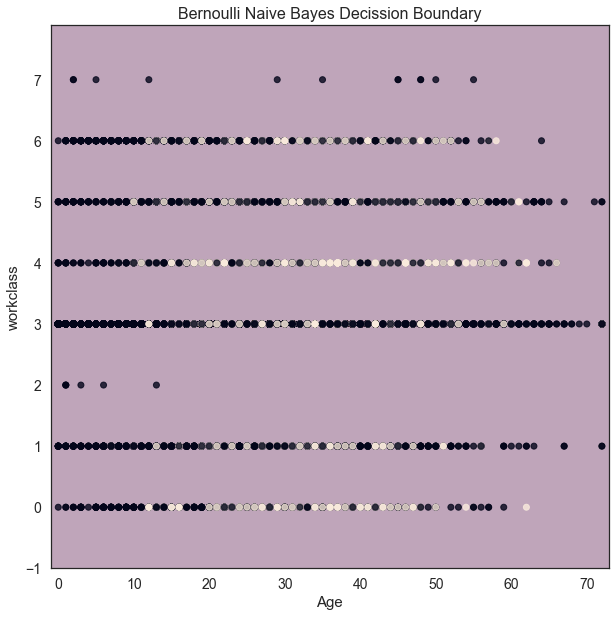

In [31]:
plt.figure(figsize=(10,10))
plot_decision_boundaries(X_train, y_train,BernoulliNB)
plt.title("Bernoulli Naive Bayes Decission Boundary",fontsize=16)

Text(0.5, 1.0, 'Multinomial Naive Bayes Decission Boundary')

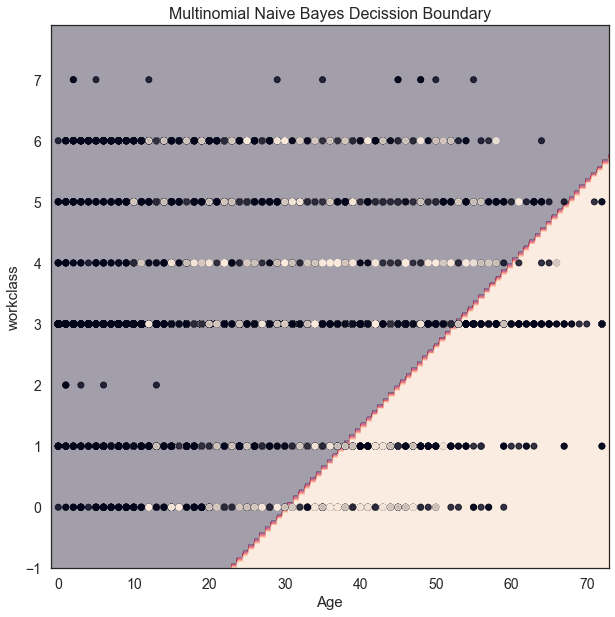

In [32]:
plt.figure(figsize=(10,10))
plot_decision_boundaries(X_train, y_train,MultinomialNB)
plt.title("Multinomial Naive Bayes Decission Boundary",fontsize=16)

Text(0.5, 1.0, 'Gaussian Naive Bayes Decission Boundary')

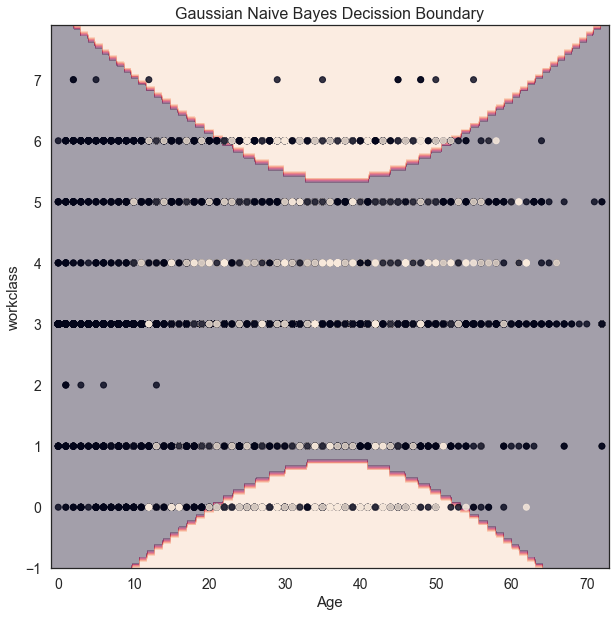

In [33]:
plt.figure(figsize=(10,10))
plot_decision_boundaries(X_train, y_train,GaussianNB)
plt.title("Gaussian Naive Bayes Decission Boundary",fontsize=16)